# 911 Calls Capstone Project

We will be analyzing some 911 call data from Pennsylvania, obtained from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

____
## Data and Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [43]:
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('911.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


____
## Basic Observations

In [6]:
df['zip'].value_counts().head()

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [7]:
df['twp'].value_counts().head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [8]:
df['title'].nunique()

110

There are 110 unique reasons for 911 calls.

In [4]:
df['title'].value_counts()

title
Traffic: VEHICLE ACCIDENT -        23066
Traffic: DISABLED VEHICLE -         7702
Fire: FIRE ALARM                    5496
EMS: RESPIRATORY EMERGENCY          5112
EMS: CARDIAC EMERGENCY              5012
                                   ...  
EMS: DISABLED VEHICLE                  1
Fire: UNKNOWN MEDICAL EMERGENCY        1
Fire: DIABETIC EMERGENCY               1
EMS: BOMB DEVICE FOUND                 1
Fire: SYNCOPAL EPISODE                 1
Name: count, Length: 110, dtype: int64

By far the most common reasons for calling 911 were car-related, with car accidents greatly outpacing disabled vehicles. Most of the calls came from Lower Merion, which is a suburb of Philadelphia. Let's look at the breakdown of call reasons within Lower Merion:

In [5]:
df[df['twp']=='LOWER MERION']['title'].value_counts().head()

title
Traffic: VEHICLE ACCIDENT -    2324
Traffic: DISABLED VEHICLE -     787
Fire: FIRE ALARM                772
Traffic: ROAD OBSTRUCTION -     406
EMS: VEHICLE ACCIDENT           350
Name: count, dtype: int64

Evidently there are different subversions of vehicle accident, at least two: traffic and EMS.

____
## Creating new features

Let's split the responding department from the reason. We will have to make some assumptions about formatting, but since there are only 110 unique full titles and we know that there are duplicate reasons from different departments, they should be simple enough to check.

The format of the the title column appears to be 'Department: Reason'. We can try splitting the title at the colon.

In [6]:
df['department'] = df['title'].apply(lambda str: str.split(':')[0])

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [8]:
df['reason'] = df['title'].apply(lambda str: str.split(': ')[1])

In [12]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS


Based on the splitting, the breakdown of departments is:

In [11]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

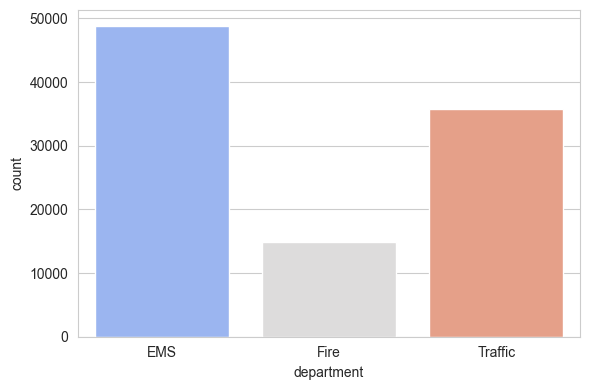

In [86]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'department', orient='v', hue='department', palette='coolwarm')
plt.tight_layout()

In [14]:
for elt in df['reason'].unique():
    print(elt)

BACK PAINS/INJURY
DIABETIC EMERGENCY
GAS-ODOR/LEAK
CARDIAC EMERGENCY
DIZZINESS
HEAD INJURY
NAUSEA/VOMITING
RESPIRATORY EMERGENCY
SYNCOPAL EPISODE
VEHICLE ACCIDENT -
VEHICLE ACCIDENT
DISABLED VEHICLE -
APPLIANCE FIRE
GENERAL WEAKNESS
CARBON MONOXIDE DETECTOR
UNKNOWN MEDICAL EMERGENCY
UNRESPONSIVE SUBJECT
ALTERED MENTAL STATUS
FIRE ALARM
CVA/STROKE
ROAD OBSTRUCTION -
SUBJECT IN PAIN
HEMORRHAGING
FALL VICTIM
ASSAULT VICTIM
SEIZURES
MEDICAL ALERT ALARM
ABDOMINAL PAINS
PUMP DETAIL
FIRE INVESTIGATION
OVERDOSE
MATERNITY
UNCONSCIOUS SUBJECT
CHOKING
LACERATIONS
TRASH/DUMPSTER FIRE
UNKNOWN TYPE FIRE
BUILDING FIRE
ELECTRICAL FIRE OUTSIDE
DEBRIS/FLUIDS ON HIGHWAY
DEBRIS/FLUIDS ON HIGHWAY -
FEVER
ALLERGIC REACTION
VEHICLE LEAKING FUEL -
FRACTURE
BURN VICTIM
RESCUE - GENERAL
WOODS/FIELD FIRE
FIRE SPECIAL SERVICE
VEHICLE FIRE
VEHICLE FIRE -
WARRANT SERVICE
S/B AT HELICOPTER LANDING
EMS SPECIAL SERVICE
HAZARDOUS ROAD CONDITIONS -
RESCUE - ELEVATOR
DEHYDRATION
SHOOTING
POISONING
TRANSFERRED CALL
RESCUE

There are several reasons that differ only by a hyphen at the end. There are few enough of them to replace them by hand.

In [15]:
replacements = {'VEHICLE ACCIDENT -':'VEHICLE ACCIDENT', 'DISABLED VEHICLE -':'DISABLED VEHICLE', 'ROAD OBSTRUCTION -':'ROAD OBSTRUCTION',
                'DEBRIS/FLUIDS ON HIGHWAY -':'DEBRIS/FLUIDS ON HIGHWAY', 'VEHICLE LEAKING FUEL -':'VEHICLE LEAKING FUEL',
                'VEHICLE FIRE -':'VEHICLE FIRE', 'HAZARDOUS ROAD CONDITIONS -':'HAZARDOUS ROAD CONDITIONS'}

df.replace(replacements, inplace=True)

In [19]:
for elt in df['reason'].unique():
    print(elt)

BACK PAINS/INJURY
DIABETIC EMERGENCY
GAS-ODOR/LEAK
CARDIAC EMERGENCY
DIZZINESS
HEAD INJURY
NAUSEA/VOMITING
RESPIRATORY EMERGENCY
SYNCOPAL EPISODE
VEHICLE ACCIDENT
DISABLED VEHICLE
APPLIANCE FIRE
GENERAL WEAKNESS
CARBON MONOXIDE DETECTOR
UNKNOWN MEDICAL EMERGENCY
UNRESPONSIVE SUBJECT
ALTERED MENTAL STATUS
FIRE ALARM
CVA/STROKE
ROAD OBSTRUCTION
SUBJECT IN PAIN
HEMORRHAGING
FALL VICTIM
ASSAULT VICTIM
SEIZURES
MEDICAL ALERT ALARM
ABDOMINAL PAINS
PUMP DETAIL
FIRE INVESTIGATION
OVERDOSE
MATERNITY
UNCONSCIOUS SUBJECT
CHOKING
LACERATIONS
TRASH/DUMPSTER FIRE
UNKNOWN TYPE FIRE
BUILDING FIRE
ELECTRICAL FIRE OUTSIDE
DEBRIS/FLUIDS ON HIGHWAY
FEVER
ALLERGIC REACTION
VEHICLE LEAKING FUEL
FRACTURE
BURN VICTIM
RESCUE - GENERAL
WOODS/FIELD FIRE
FIRE SPECIAL SERVICE
VEHICLE FIRE
WARRANT SERVICE
S/B AT HELICOPTER LANDING
EMS SPECIAL SERVICE
HAZARDOUS ROAD CONDITIONS
RESCUE - ELEVATOR
DEHYDRATION
SHOOTING
POISONING
TRANSFERRED CALL
RESCUE - TECHNICAL
EYE INJURY
ELECTROCUTION
STABBING
FIRE POLICE NEEDED
AMP

In [24]:
type(df['timeStamp'].iloc[0])

str

____
### Aggregrate Calls by Days of Week

The entries in the timeStamp column are currently just strings. If we are interested in examining, say, which day of the week or which month has the most 911 calls, it will be convenient to convert the entries to pandas DateTime objects.

In [21]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   lat         99492 non-null  float64       
 1   lng         99492 non-null  float64       
 2   desc        99492 non-null  object        
 3   zip         86637 non-null  float64       
 4   title       99492 non-null  object        
 5   timeStamp   99492 non-null  datetime64[ns]
 6   twp         99449 non-null  object        
 7   addr        98973 non-null  object        
 8   e           99492 non-null  int64         
 9   department  99492 non-null  object        
 10  reason      99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 8.3+ MB


Let's go ahead and split up the dateTime column into hours, days of the week, and months.

In [35]:
df['Hour'] = df['timeStamp'].apply(lambda dt: dt.hour)
df['Month'] = df['timeStamp'].apply(lambda dt: dt.month)
df['Day of Week'] = df['timeStamp'].apply(lambda dt: dt.dayofweek)

For readability, let's convert the Day of Week integers into their names.

In [38]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [39]:
Days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

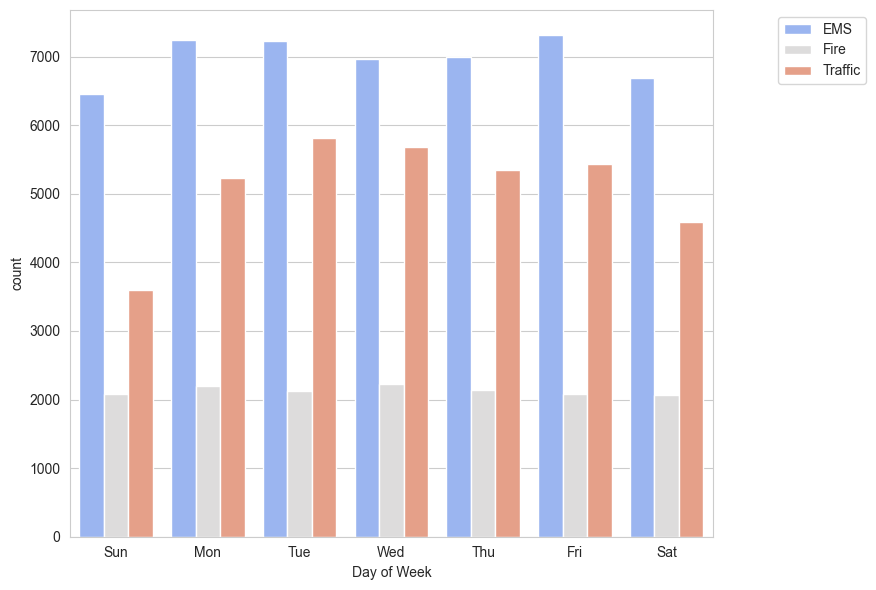

In [82]:
plt.figure(figsize=(9,6))
sns.countplot(data = df, x = 'Day of Week', hue = 'department', palette="coolwarm",
              order=Days).legend(bbox_to_anchor=(1.25,1), loc='upper right')
plt.tight_layout()

<p>Fire calls don't appear to vary much across the days of the week. EMS calls also don't vary much, although they are lowest on the weekend and highest on Friday. Traffic calls are predictable the lowest on Sundays and second-lowest on Saturdays.</p>

<p>The trends make sense because people tend to work less on weekends, and car accidents are the largest source of both Traffic and EMS calls.
</p>

____
### Aggregate Calls by Month

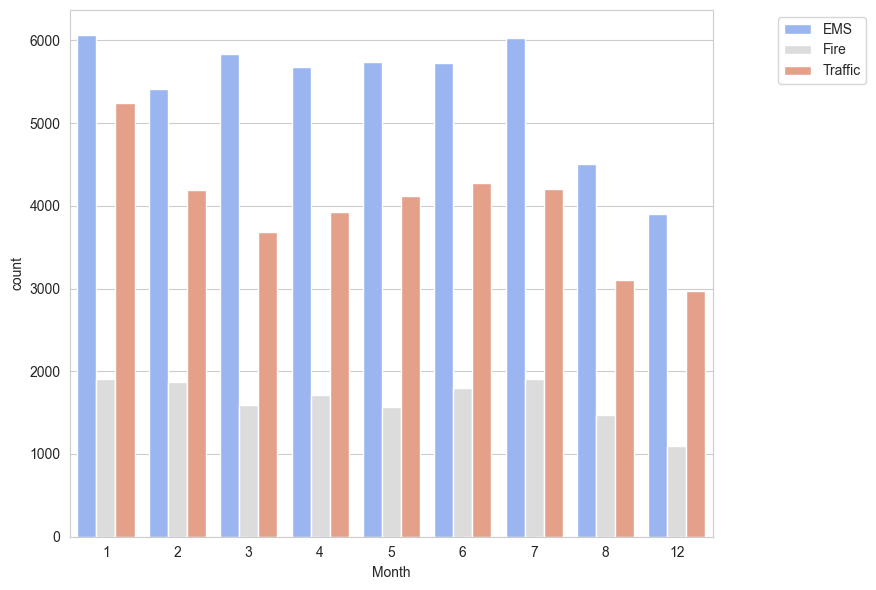

In [81]:
plt.figure(figsize=(9,6))
sns.countplot(data = df, x = 'Month', hue = 'department', palette='coolwarm').legend(bbox_to_anchor=(1.25,1), loc='upper right')
plt.tight_layout()

<p>The calls in all three categories are at a minimum during December. Perhaps the traffic calls are minimal there because people tend to stay in the most during the holiday season. Traffic calls spike during January, maybe as a result of east coast winter storms?</p>

<p>Notice that September, October, and November are missing from this plot, which is to say missing from the data set. We can get a sense of how calls behave during these months by linear interpolation between August and December.
</p>

We'll choose to look at total calls instead of separating them based on department.

In [50]:
byMonth = df.groupby(by = 'Month').count()

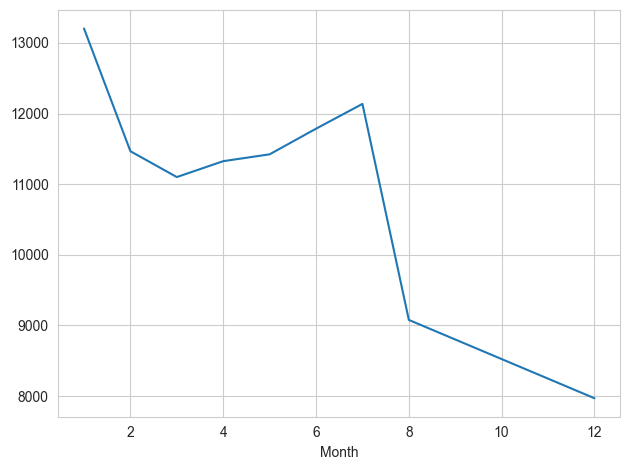

In [79]:
byMonth['Day of Week'].plot()
plt.tight_layout()

The total calls per month don't appear to fully trend downward throughout the year, but that is the overall behavior. A course-grained description of the behavior will be given by a linear trend line.

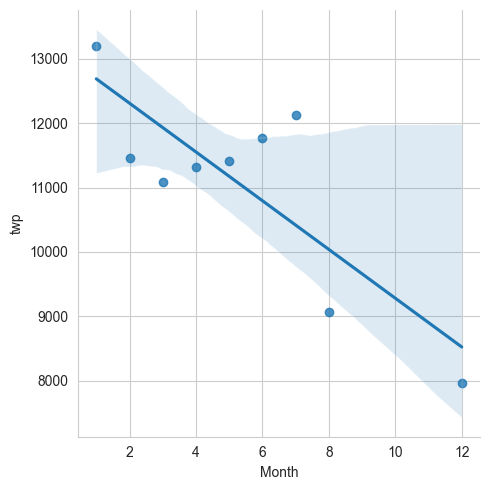

In [78]:
sns.lmplot(data = byMonth.reset_index(), x = 'Month', y = 'twp')
plt.tight_layout()

____
### Fine Grain Analysis

Let's look at the day-by-day behavior of total calls.

In [58]:
df['Date'] = df['timeStamp'].apply(lambda dt: dt.date())

In [60]:
byDate = df.groupby(by = 'Date').count()

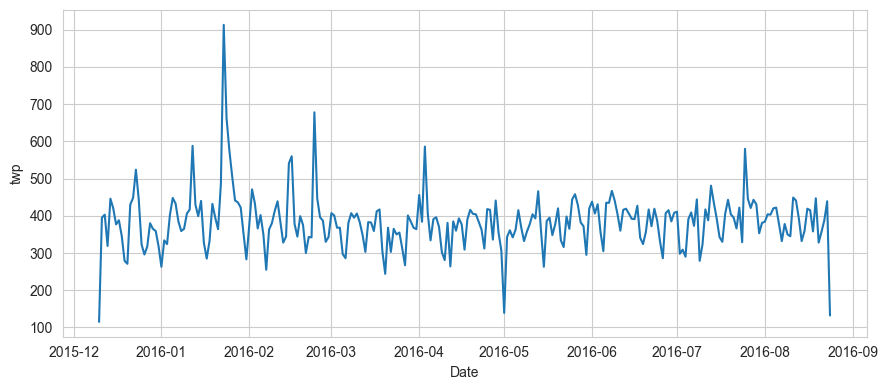

In [73]:
plt.figure(figsize=(9,4))
sns.lineplot(data=byDate, x=byDate.index, y='twp')
plt.tight_layout()

Separating out the departments:

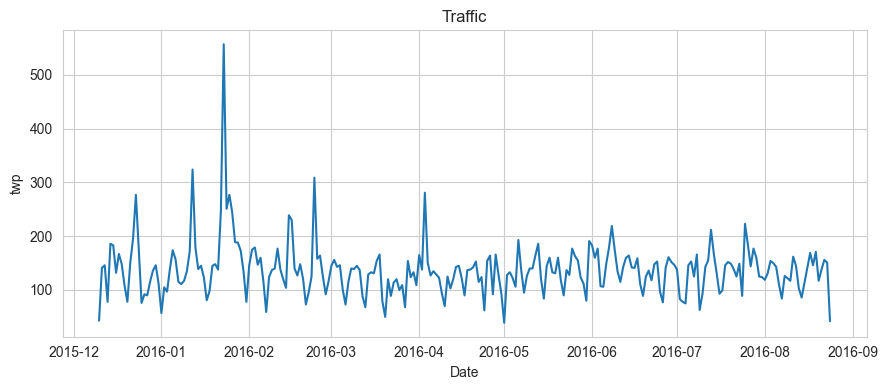

In [72]:
byDate_Traffic = df[df['department']=='Traffic'].groupby(by='Date').count()
plt.figure(figsize=(9,4))
sns.lineplot(data=byDate_Traffic, x=byDate.index, y='twp')
plt.title('Traffic')
plt.tight_layout()

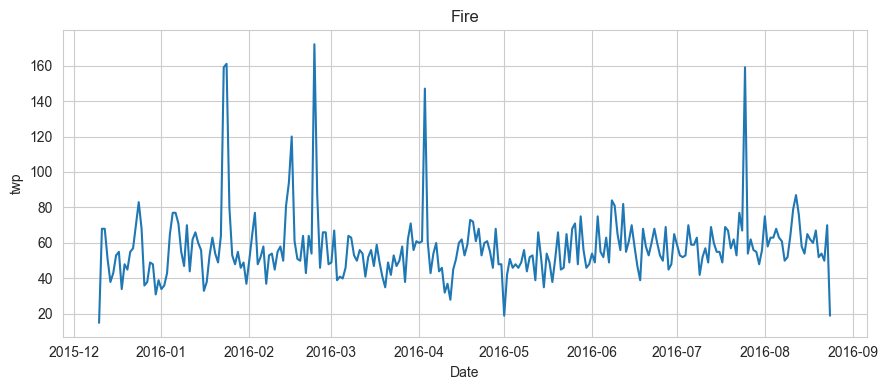

In [71]:
byDate_Fire = df[df['department']=='Fire'].groupby(by='Date').count()
plt.figure(figsize=(9,4))
sns.lineplot(data=byDate_Fire, x=byDate.index, y='twp')
plt.title('Fire')
plt.tight_layout()

It's curious that the spike in fire calls during July does not appear to be on the 4th of July, when I would expect fireworks and bonfires to cause issues.

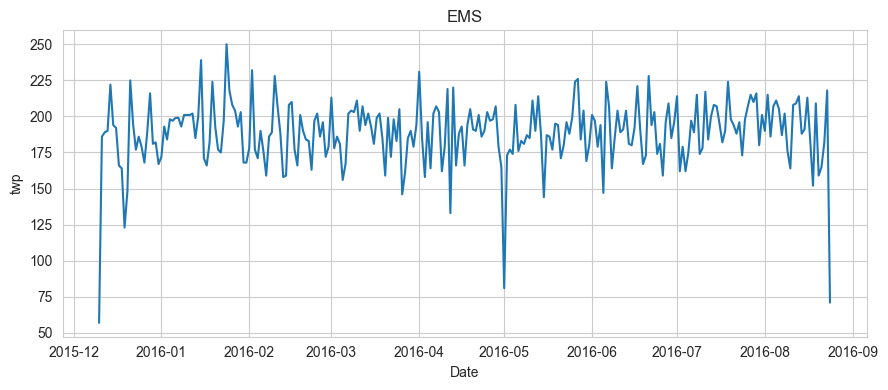

In [75]:
byDate_EMS = df[df['department']=='EMS'].groupby(by='Date').count()
plt.figure(figsize=(9,4))
sns.lineplot(data=byDate_EMS, x=byDate.index, y='twp')
plt.title('EMS')
plt.tight_layout()

EMS has the highest number of calls throughout the year and thus it makes sense that it maintaines the highest baseline at around 185 per day. It is interesting that, whereas Fire and Traffic spike suddenly at various points, EMS has dips. Moreover, the three dips in EMS calls are more or less evenly spaced. More specific knowledge of this area of Pennsylvania is likely needed in order to draw conclusions from this.

____
## Fine Grain Analysis with Heat Maps

We are going to see how calls vary throughout the day, by looking at aggregate calls by day throughout the year.

In [100]:
byDay_Hour = df.groupby(['Day of Week', 'Hour']).count()['twp'].unstack(level=-1).reindex(Days)

Preview of the restructured dataframe:

In [101]:
byDay_Hour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


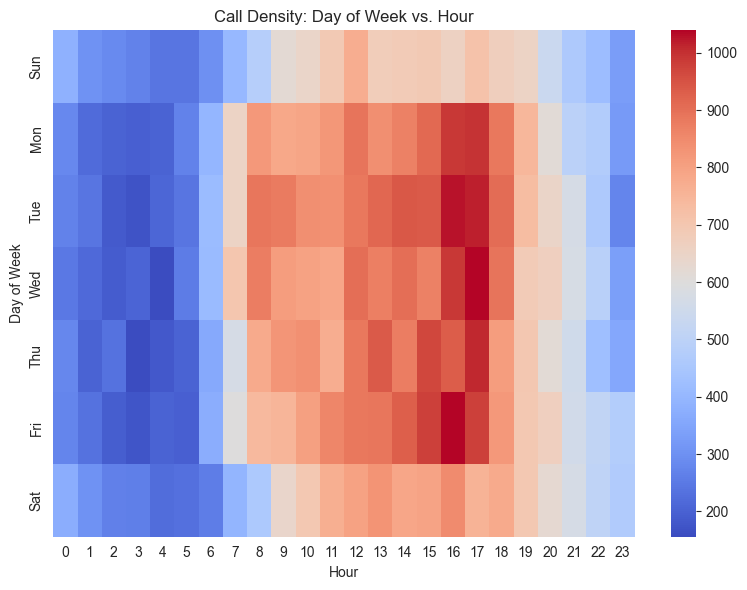

In [102]:
plt.figure(figsize=(8,6))
sns.heatmap(byDay_Hour, cmap="coolwarm")
plt.title('Call Density: Day of Week vs. Hour')
plt.tight_layout()

Every day of the week sees the highest density of calls between about 8AM and 8PM. The absolute highest density during the work week is around 5PM. Many people get out of work around 5PM and drive home; since most of the calls are because of car accidents, it would make sense that they would occur when people are on the road, tired after working all day. This is further demonstrated through the following cluster map plot.

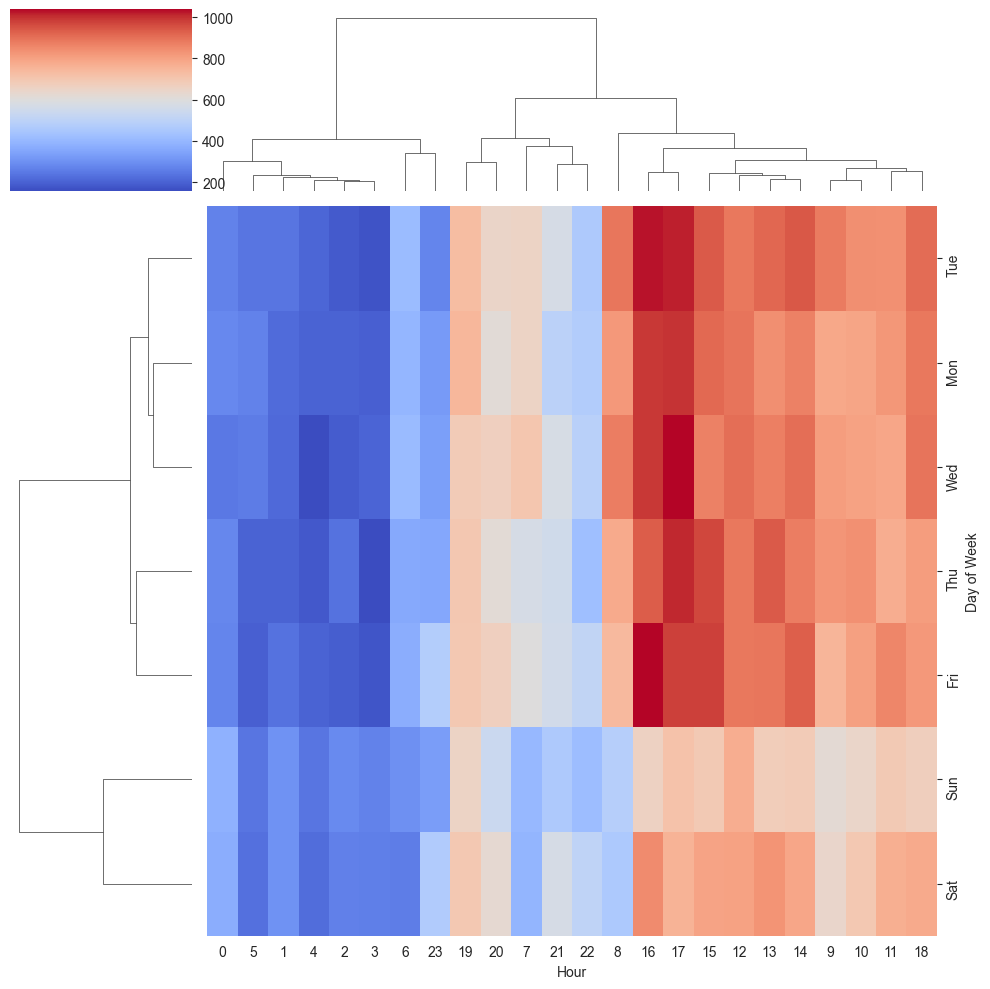

In [107]:
sns.clustermap(byDay_Hour, cmap="coolwarm")
plt.tight_layout()

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [109]:
byDay_Month = df.groupby(['Day of Week', 'Month']).count()['twp'].unstack(level=-1).reindex(Days)

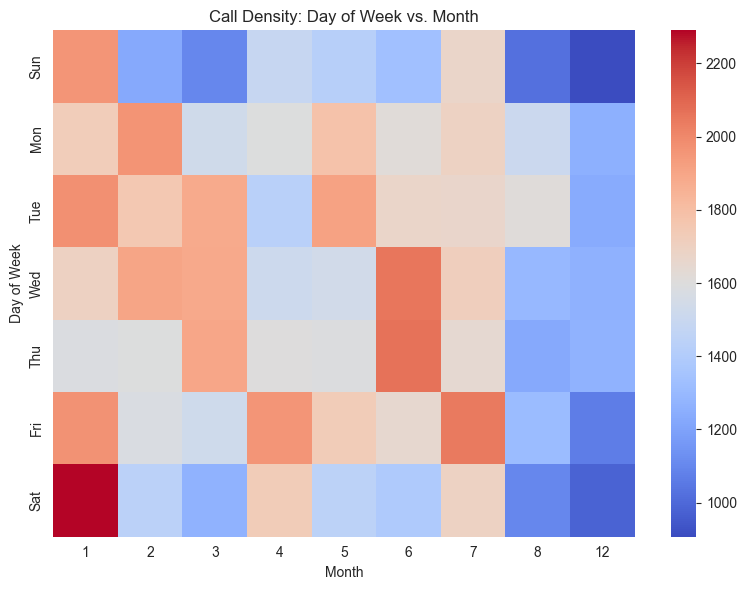

In [110]:
plt.figure(figsize=(8,6))
sns.heatmap(byDay_Month, cmap="coolwarm")
plt.title('Call Density: Day of Week vs. Month')
plt.tight_layout()

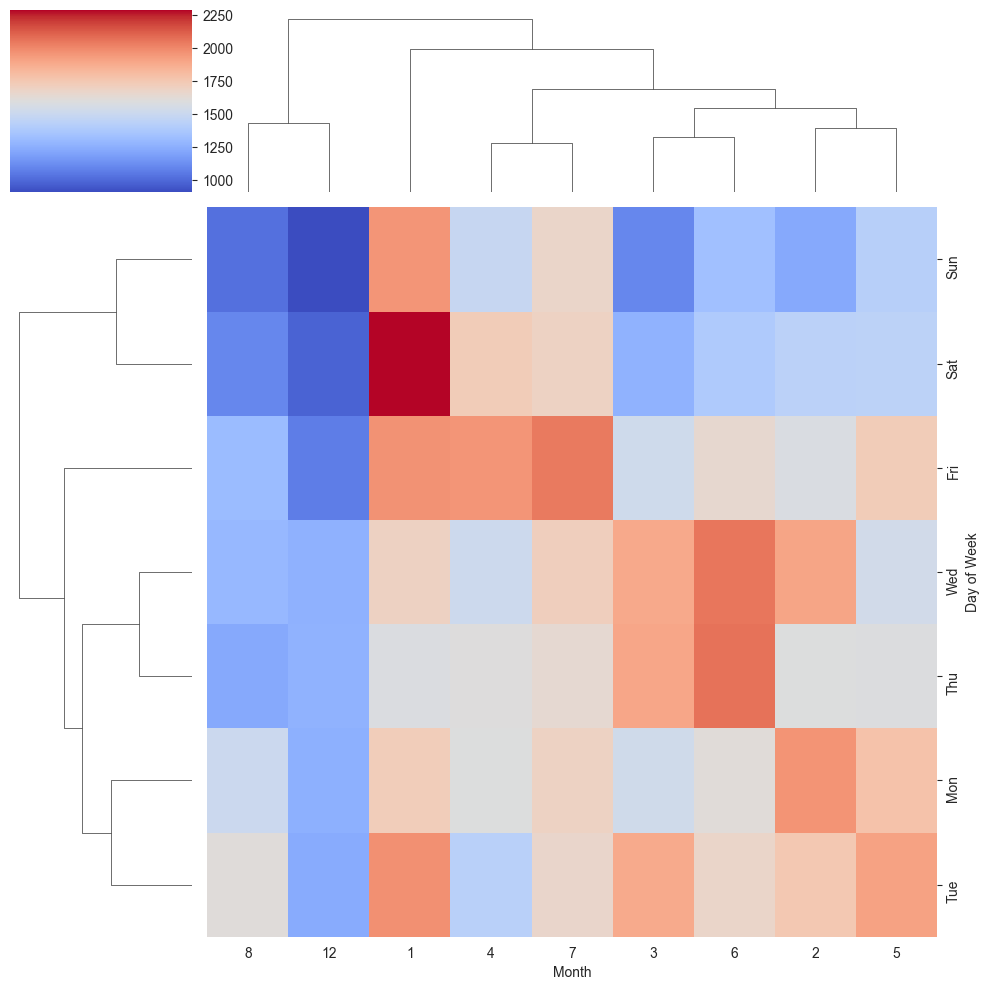

In [111]:
sns.clustermap(byDay_Month, cmap='coolwarm')
plt.tight_layout()

We see once again that the number of calls is lowest at the end of the year and on weekends. The weekends in January, April, and July are exceptions. Saturdays in January have the highest number of calls out of the year. There are spikes in January for both Traffic and Fire, so perhaps they happened on Saturday(s).

____
## Geographical Information

So far, we have not used the latitude/longitude data. Let's see if we can construct a sort of geographical heat map.

In [112]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,department,reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,17,12,Thu,2015-12-10


In [127]:
len(df)

99492

<Axes: xlabel='lat', ylabel='lng'>

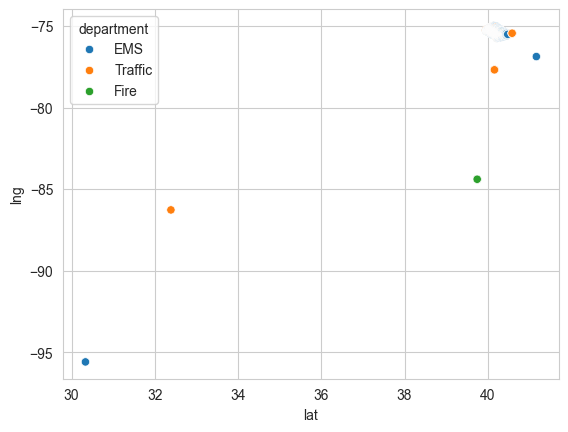

In [133]:
sns.scatterplot(data = df.sort_values(['lat', 'lng'], ascending=True), x='lat', y='lng', hue='department')

Clearly there are some outliers, and most of the calls are from about 40 $\leq$ lat $\leq$ 42 and -80 $\leq$ lng $\leq$ -75.

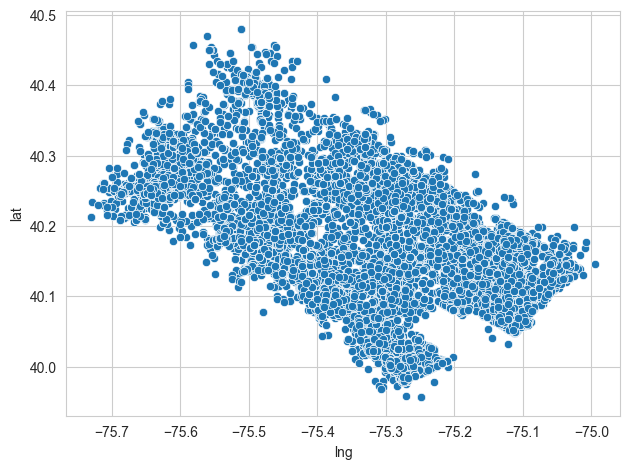

In [139]:
sns.scatterplot(data = df[(df['lat'] <= 41) & (df['lat'] >= 39) & (df['lng'] >= -76) & (df['department']=='EMS')], y='lat', x='lng')
plt.tight_layout()

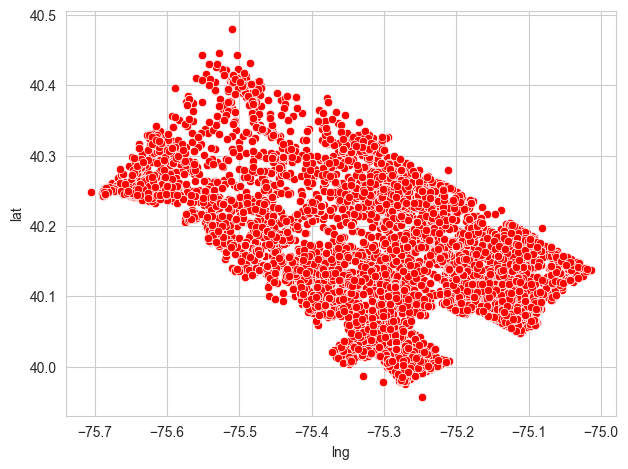

In [142]:
sns.scatterplot(data = df[(df['lat'] <= 41) & (df['lat'] >= 39) & (df['lng'] >= -76) & (df['department']=='Fire')], y='lat', x='lng', color='r')
plt.tight_layout()

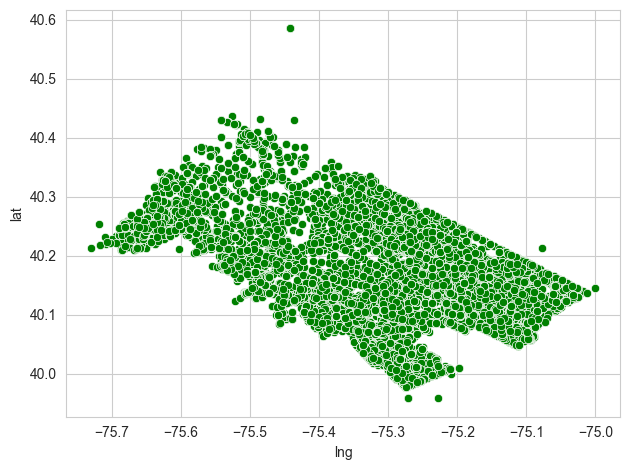

In [147]:
sns.scatterplot(data = df[(df['lat'] <= 41) & (df['lat'] >= 39) & (df['lng'] >= -76) & (df['department']=='Traffic')], y='lat', x='lng', color='g')
plt.tight_layout()

Each of the plots produces the same general outline of the area. 

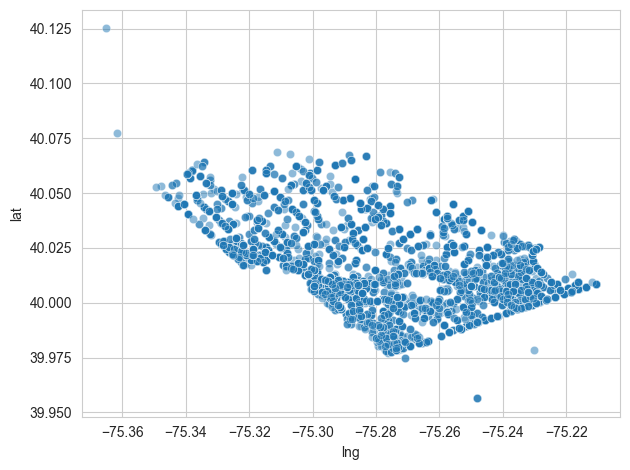

In [150]:
sns.scatterplot(data = df[(df['lat'] <= 41) & (df['lat'] >= 39) & (df['lng'] >= -76) & (df['twp']=='LOWER MERION')], 
                y='lat', x='lng', alpha=0.5)
plt.tight_layout()

We can, for example, zoom in on the Lower Merion township. The highest density of calls comes from the part of the township closest to Philadelphia. There are some strays that probably got misclassified or were just dealt with by the responders from this township.